In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile
df = pd.read_excel('study_hours.xlsx')

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

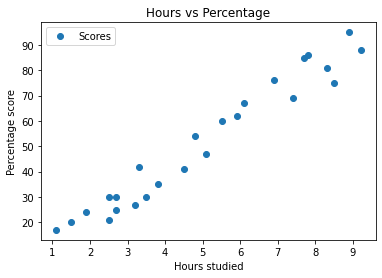

In [8]:
df.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

In [11]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
X
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

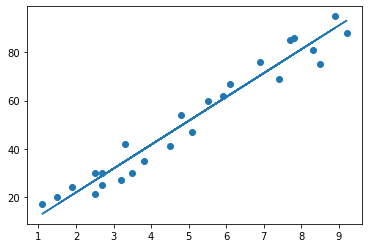

In [40]:
line= lm.coef_*X+lm.intercept_
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

In [66]:
print(X_test) # Testing data - In Hours
y_pred = lm.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


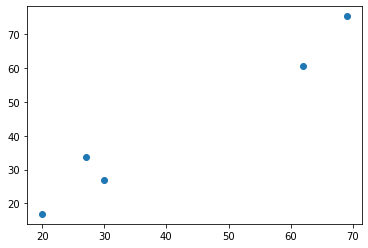

In [56]:
plt.scatter(y_test,y_pred)

In [57]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [58]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [68]:
hours = 9.25
Own_pred = lm.predict([[hours]])
print("No. of Hours={}".format(hours))
print("Predicted hours={}".format(Own_pred[0]))


No. of Hours=9.25
Predicted hours=93.69173248737538


In [69]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
